In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
#load crime data
crime_data = pd.read_csv('../data/Crime_data_2012.csv')

crime_data = crime_data.T

column_names = crime_data.iloc[0]
columns = column_names.tolist()
crime_data.columns = columns

crime_data = crime_data.iloc[1:]
crime_data = crime_data.sort_index()

crime_data.to_csv('out.csv')
crime_data = pd.read_csv('out.csv')
crime_data.rename(columns={'Unnamed: 0':'District'},inplace=True)
#crime_data.set_index("District",drop=True,inplace=True)

print("Data set size : ", crime_data.shape)

crime_data.head()

Data set size :  (25, 23)


,District,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Attempted Homicide,Rape / Incest,...,Extortion,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs"
0,Ampara,29,31,36,239,69,38,16,12,37,...,2,232,242,1,0,1,2,1,0,1
1,Anuradhapura,68,47,107,834,108,72,24,15,199,...,9,270,584,6,0,23,2,4,1,7
2,Badulla,38,14,42,359,112,85,28,11,73,...,1,138,296,1,0,2,0,3,0,20
3,Batticaloa,21,33,38,227,56,89,11,2,52,...,4,225,221,1,0,6,3,1,1,3
4,Colombo,154,22,140,2996,248,379,62,21,120,...,37,1736,2809,4,0,52,1,21,6,573


In [3]:
print(crime_data)

        District  Abduction / Kidnapping  Arson  Mischief  over Rs.5000/=  \
0         Ampara                      29     31                        36   
1   Anuradhapura                      68     47                       107   
2        Badulla                      38     14                        42   
3     Batticaloa                      21     33                        38   
4        Colombo                     154     22                       140   
5          Galle                      73     38                        32   
6        Gampaha                     159     27                       100   
7     Hambantota                      53     23                        33   
8         Jaffna                      23      6                        46   
9       Kalutara                      72     17                        50   
10         Kandy                      62     30                        68   
11       Kegalle                      60     42                        58   

In [3]:
fp1 = "../data/map_shape/LKA_adm1.shp"
map_df_1 = gpd.read_file(fp1)
map_df_1.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,217,LKA,Sri Lanka,1,Ampara,Distrikkaya,District,None,Amparai,(POLYGON ((81.78319549560564 7.448750019073543...
1,217,LKA,Sri Lanka,2,Anuradhapura,Distrikkaya,District,None,None,"POLYGON ((80.79398345947294 8.917964935302848,..."
2,217,LKA,Sri Lanka,3,Badulla,Distrikkaya,District,None,None,"POLYGON ((80.98494720458979 7.61256122589117, ..."
3,217,LKA,Sri Lanka,4,Batticaloa,Distrikkaya,District,None,None,(POLYGON ((81.80958557128912 7.494583129882926...
4,217,LKA,Sri Lanka,5,Colombo,Distrikkaya,District,None,None,(POLYGON ((79.90155029296903 6.714582920074406...


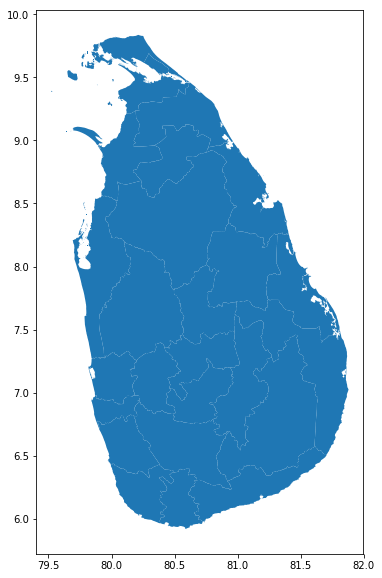

In [4]:
map_df_1.plot(figsize=(20,10))

In [5]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df_1.set_index("NAME_1").join(crime_data.set_index("District"))
merged.head()


,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Abduction / Kidnapping,...,Extortion,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs"
NAME_1,,,,,,,,,,,,,,,,,,,,,
Ampara,217,LKA,Sri Lanka,1,Distrikkaya,District,None,Amparai,(POLYGON ((81.78319549560564 7.448750019073543...,29.0,...,2.0,232.0,242.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0
Anuradhapura,217,LKA,Sri Lanka,2,Distrikkaya,District,None,None,"POLYGON ((80.79398345947294 8.917964935302848,...",68.0,...,9.0,270.0,584.0,6.0,0.0,23.0,2.0,4.0,1.0,7.0
Badulla,217,LKA,Sri Lanka,3,Distrikkaya,District,None,None,"POLYGON ((80.98494720458979 7.61256122589117, ...",38.0,...,1.0,138.0,296.0,1.0,0.0,2.0,0.0,3.0,0.0,20.0
Batticaloa,217,LKA,Sri Lanka,4,Distrikkaya,District,None,None,(POLYGON ((81.80958557128912 7.494583129882926...,21.0,...,4.0,225.0,221.0,1.0,0.0,6.0,3.0,1.0,1.0,3.0
Colombo,217,LKA,Sri Lanka,5,Distrikkaya,District,None,None,(POLYGON ((79.90155029296903 6.714582920074406...,154.0,...,37.0,1736.0,2809.0,4.0,0.0,52.0,1.0,21.0,6.0,573.0


In [6]:
merged = merged[['geometry','Extortion']]
merged.head()

,geometry,Extortion
NAME_1,,
Ampara,(POLYGON ((81.78319549560564 7.448750019073543...,2.0
Anuradhapura,"POLYGON ((80.79398345947294 8.917964935302848,...",9.0
Badulla,"POLYGON ((80.98494720458979 7.61256122589117, ...",1.0
Batticaloa,(POLYGON ((81.80958557128912 7.494583129882926...,4.0
Colombo,(POLYGON ((79.90155029296903 6.714582920074406...,37.0


In [8]:
merged['Extortion'] = pd.to_numeric(merged['Extortion'])
merged.head()

,geometry,Extortion
NAME_1,,
Ampara,(POLYGON ((81.78319549560564 7.448750019073543...,2.0
Anuradhapura,"POLYGON ((80.79398345947294 8.917964935302848,...",9.0
Badulla,"POLYGON ((80.98494720458979 7.61256122589117, ...",1.0
Batticaloa,(POLYGON ((81.80958557128912 7.494583129882926...,4.0
Colombo,(POLYGON ((79.90155029296903 6.714582920074406...,37.0


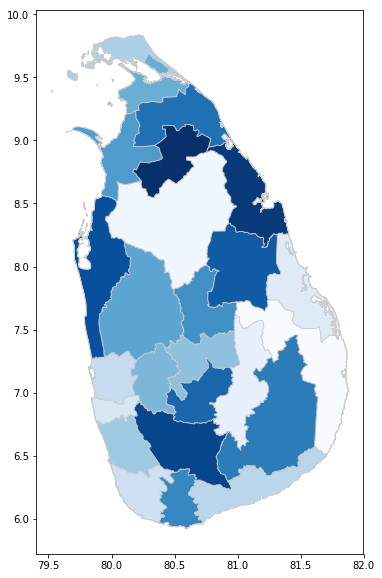

In [8]:
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(20, 10))
merged.plot(cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

C:\Users\Navoda\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


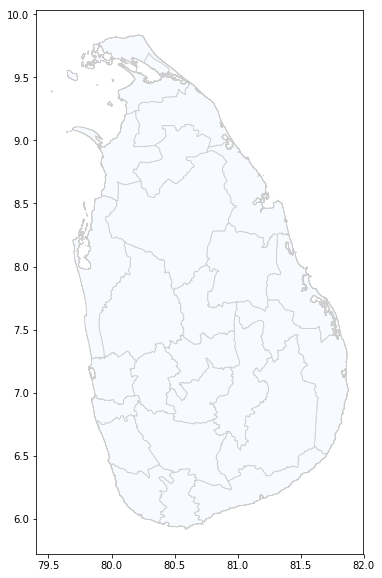

In [9]:
variable = 'Extortion'
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(20, 10))
merged.plot(variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')